<hr color=darkblue>

# 🤔**Task 1: Theory**

## **Task 1.1**

Indicate whether the following statements are **True** or **False**. Justify your answers.

1. A training error of the 1-nearest neighbour (NN) model is always 0. *Hint*: See KNN in 📖
1. A test error of 1-NN model is never 0. *Hint*: See KNN in 📖
1. A decision tree generated with binary splitting has always $m + 1$ terminal nodes, where $m$ is the number of internal nodes.
1. Consider a data matrix $X_{n\times p}$ with an $i$-th observation as a row $X_{i\bullet}$. In $K$-fold cross-validation each $X_{i\bullet}$ belongs to exactly one test fold, $\mathcal X_1,...,\mathcal X_K$, so the test folds are independent sets
 . Then the error estimates of the separate folds are also independent. Equivalently, given that the unique test folds $\mathcal{X}_i$ and $\mathcal{X}_{j}$ are independent, the error estimates on test  folds $i$ and $j$, say $e_i$ and $e_j$, are also independent.

## **SOLUTION**

1. This is true, because training error here is when we input training set to KNN as test set. Consider K = 1, is our closest training sample to test. Hence, as we include it as the best sample in our data training set => the training error will be zero for K = 1.
2. This is false, because testing error can never be 0 for K = 1, as being low bias and high variance, points are overestimated and there is a highly flexible boundary.
3. This is true, decision tree with binary splitting has $ 2^k$ nodes at each level k. The total number of nodes would be  $2^0+2^1+2^2+...+2^n$, n here is the height of binary tree.  $N = 2^0+2^1+2^2+...+2^n$ . Tree of height 2: $N = 3+4 = 8 $, 4 is $m + 1$ => 3 is m, let's consider height of 3 => $N = 3+4 + 8 = 15 $ 8 is $m + 1$ and $(3+4) = 7$ is m. Hence, TRUE.
4. This is false, because every  Xi  may occur in training tests creating the dependence between them. Error estimation dependent as well.

## **Task 1.2**

Given observations $\{z_i:=\left(x_i,y_i\right)\}_1^n$, consider a bootstrap
sample, $\mathcal Z$, generated from it.

1. Describe how a bootstrap sample is obtained and argue that the
probability that $z_1$ is not in the bootstrap sample is $\left(1 - \frac{1}{n}\right)^n$
1. Compute $\mathbb P [z_n\in\mathcal Z]$ for $n = 5$.
1. What is a potential use for the observations excluded from $\mathcal Z$?
1. Describe how to use bootstrap (and a suitable predictive ML model) to estimate $\mathbb{V}Y_1$, i.e. the variance of the random variable realized (only once) as $y_1$.

## **SOLUTION**

1. We select n observations from the data set in order to produce a bootstrap data set Z. As we know sampling is the process of replacement, so that the each observation can repeat in our sample. Probability of ${z}_{{1}}$ not to be in our sample is the multiplication of probabilities that each bootstrap observation is not the first observation. It is ${\left({1}-\frac{1}{{n}}\right)}^{n}$ => probabilities are independent.

2.  $P({z}_{5}) = 1-(1-\frac{1}{{5}})^5=1-0.32768=0.67232.$

3. We can use them in the validation process, to check estimations in our bootstrapping process.

4. If the task is to estimate the variance of true (observed) $Y_1$, then each dataset $\mathbf{z}$ contains the corresponding $y_1$. We have only one such dataset, but with bootstrapping we can create multiple bootstrapped datasets $\mathbf{z}^{(j)}$ from it. We then extract $y_1^{(j)}$ from each $\mathbf{z}^{(j)}$ and then estimate $\mathbb VY_1$ as the sample variance of $y_1^{(j)}$ for $j \in \{1,2,\dots,B\}$, where $B$ is the number of generated boostrap samples.
   
   If the task is to estimate the variance of a predicted $Y_1$ (i.e. $\hat Y_1$) by a certain ML model $\hat Y_i = M(X_i)$, then
   do the same things, but instead of $y_1^{(j)}$ use $f^{(j)}(x_1^{(j)})$, where $f^{(j)}$ represents a model trained on $\mathbf{z}^{(j)}$.

<hr color=darkblue>

# 🪐**Task 2: Kaggle-Venus vs Mars**

<details><summary><font color=darkblue>More info and Kaggle API instructions</font></summary>

**Private URL** for students (allows submission) is in Moodle's HW assignment. **Public URL** with read-only access is [here](https://www.kaggle.com/c/hse-ml-hw13-dec-6-venus-vs-mars/rules). See competition rules, submission, grading, dataset, and performance metric. The **starter code** below produces a baseline model, which you should beat, while respecting the competition rules. Your code starts after the timer. This is your baseline model. Seed all [RNG](https://en.wikipedia.org/wiki/Random_number_generation) for reproducibility!

**Instructions for enabling Kaggle API in Colab**:
1. Accept competition rules before running [Kaggle API](https://github.com/Kaggle/kaggle-api#api-credentials). [Loading Kaggle dataset example](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab)
1. In your Kaggle Account, [Create API Token](https://github.com/Kaggle/kaggle-api#api-credentials) and save the resulting **kaggle.json** file to the [root of your Google Drive](https://drive.google.com/drive/u/0/my-drive) 
2. In Colab, open **Files** panel 🗀 (on the left) and click gray folder icon <font color=gray>🖿</font> to mount your Google drive

Your Kaggle/Google Drive credentials are secure; and Colab's kaggle.json only lasts a Colab session.

</details>


In [1]:
!pip -q install --upgrade --force-reinstall --no-deps kaggle > log  # upgrade kaggle package (to avoid a warning)
!mkdir -p ~/.kaggle                                           # .kaggle folder must contain kaggle.json for kaggle executable to properly authenticate you to Kaggle.com
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json >log  # First, download kaggle.json from kaggle.com (in Account page) and place it in the root of mounted Google Drive
!cp kaggle.json ~/.kaggle/kaggle.json > log                   # Alternative location of kaggle.json (without a connection to Google Drive)
!chmod 600 ~/.kaggle/kaggle.json                              # give only the owner full read/write access to kaggle.json
!kaggle config set -n competition -v hse-ml-hw13-dec-6-venus-vs-mars  # set the competition context for the next few kaggle API calls. !kaggle config view - shows current settings
!kaggle competitions download >> log                          # download competition dataset as a zip file
!unzip -o *.zip >> log                                        # Kaggle dataset is copied as a single file and needs to be unzipped.


cp: /content/drive/MyDrive/kaggle.json: No such file or directory
cp: kaggle.json: No such file or directory
chmod: /Users/Simple/.kaggle/kaggle.json: No such file or directory
Traceback (most recent call last):
  File "/opt/anaconda3/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/opt/anaconda3/lib/python3.9/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/opt/anaconda3/lib/python3.9/site-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /Users/Simple/.kaggle. Or use the environment method.
Traceback (most recent call last):
  File "/opt/anaconda3/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/opt/anaconda3/lib/python3.9/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/opt/anaconda3/lib/python3.9/site-package

See [more](https://nvidia.custhelp.com/app/answers/detail/a_id/3751/~/useful-nvidia-smi-queries) about NVIDIA GPU stats. Test your code in (free) Colab. It uses Tesla K80 GPU.

In [ ]:
!nvidia-smi --query-gpu=gpu_name,memory.total,memory.free,memory.used --format=csv

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
%%time
%%capture
%reset -f
!pip -q install -U tensorflow_addons plotly > log   # update tfa in case students need to use it
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all" 
import numpy as np, pandas as pd, time, matplotlib.pyplot as plt, os
# os.environ['TF_DETERMINISTIC_OPS'] = '1'  # causes an error   https://github.com/tensorflow/tensorflow/issues/38197
import tensorflow_addons as tfa, tensorflow as tf, tensorflow.keras as keras, tensorflow_datasets as tfds
from keras.layers import Flatten, Dense, Dropout, MaxPooling2D, Conv2D, GlobalAveragePooling2D
from keras.models import Sequential
from tensorflow.keras.applications import resnet50, xception, mobilenet, mobilenet_v2, mobilenet_v3
from tensorflow.keras.utils import image_dataset_from_directory as idfd
ToCSV = lambda df, fname: df.round(2).to_csv(f'{fname}.csv', index_label='id') # rounds values to 2 decimals

class Timer():
  def __init__(self, lim:'RunTimeLimit'=60*5): self.t0, self.lim, _ = time.time(), lim, print(f'⏳ started. You have {lim} sec. Good luck!')
  def ShowTime(self):
    msg = f'Runtime is {time.time()-self.t0:.0f} sec'
    print(f'\033[91m\033[1m' + msg + f' > {self.lim} sec limit!!!\033[0m' if (time.time()-self.t0-1) > self.lim else msg)

np.set_printoptions(linewidth=100, precision=2, edgeitems=5, suppress=True)
pd.set_option('max_columns', 20, 'precision', 2, 'display.max_rows', 4)
tDIR, sDIR = 'train/', 'test/'

CPU times: user 745 ms, sys: 113 ms, total: 858 ms
Wall time: 19 s


Examples of images from female class

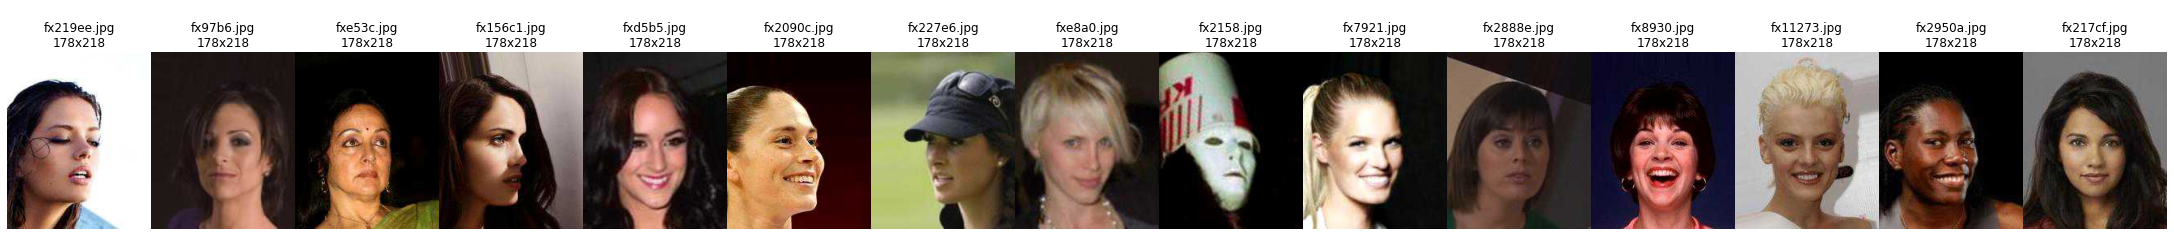

In [ ]:
n, fig = 15, plt.figure(figsize=(30,10));
for i, f in enumerate(np.random.RandomState(0).choice(os.listdir(tDIR+'female/'), n)):
  ax = plt.subplot(1, n, i + 1)
  img = keras.preprocessing.image.load_img(tDIR+'female/'+f);
  _ = ax.set_title(f'\n{f}\n{img.size[0]}x{img.size[1]}');
  _ = plt.axis('off');   _ = plt.tight_layout(pad=0);   _ = plt.imshow(img);

Examples of images from male class

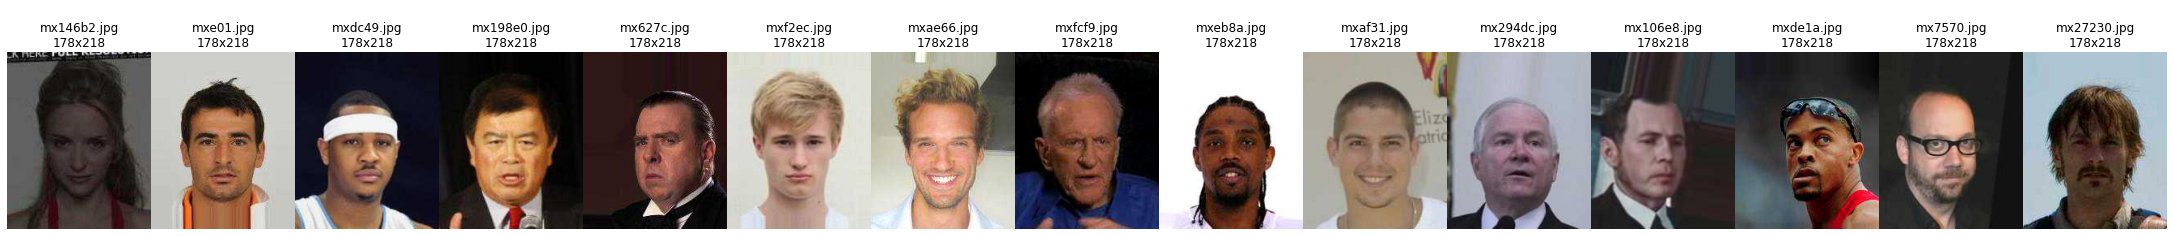

In [ ]:
n, fig = 15, plt.figure(figsize=(30,10));
for i, f in enumerate(np.random.RandomState(0).choice(os.listdir(tDIR+'male/'), n)):
  ax = plt.subplot(1, n, i + 1)
  img = keras.preprocessing.image.load_img(tDIR+'male/'+f);
  _ = ax.set_title(f'\n{f}\n{img.size[0]}x{img.size[1]}');
  _ = plt.axis('off');   _ = plt.tight_layout(pad=0);   _ = plt.imshow(img);

In [ ]:
tmr = Timer() # runtime limit (in seconds). Add all of your code after the timer

⏳ started. You have 300 sec. Good luck!


<font size=5>⏳</font> <strong><font color=orange size=5>Your Code, Documentation, Ideas and Timer - All Start Here...</font></strong>


## **Task 2.1**

**Explain your preprocessing:** i.e. feature engineering, 
subsampling, clustering, dimensionality reduction, etc.

[The Tensorflow documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/mobilenet_v2/MobileNetV2) kindly tells us that pre-trained models expect appropriate preprocessing and provides built-in functions to do so (in this case, `mobilenet_v2.preprocess_input`). The baseline model didn't call it, but now we do. The resulting improvement in accuracy was tremendous for such a simple addition: during last-layer-only training (`Adam()`, 3 epochs) the validation binary accuracy went up from about 0.7 to about 0.87.
This preprocessing is fused into the model, which is why its implementation is in the modeling section.

## **Task 2.2**

**Explain your modeling approach:** ideas you tried and why you thought they would be helpful. Takeaway: how these decisions guided you in modeling.

The following cell loads train/validation/test sets as [TF datasets](https://www.tensorflow.org/datasets), `tDS`, `vDS` and `sDS`, respectively.

In [ ]:
# batch size; image dimensions required by pretrained model
BS, image_size = 32, (224, 224)
# training dataset
tDS = idfd(
    tDIR,
    labels='inferred',
    label_mode='binary',
    subset='training',
    validation_split=0.2,
    class_names=None,
    color_mode='rgb',
    batch_size=BS,
    image_size=image_size,
    shuffle=True,
    seed=0,
).prefetch(buffer_size=tf.data.AUTOTUNE)

# validation dataset
vDS = idfd(
    tDIR,
    labels='inferred',
    label_mode='binary',
    subset='validation',
    validation_split=0.2,
    class_names=None,
    color_mode='rgb',
    batch_size=BS,
    image_size=image_size,
    shuffle=True,
    seed=0,
).prefetch(buffer_size=tf.data.AUTOTUNE)

# don't prefetch this testing dataset
sDS = idfd(
    sDIR,
    labels=None,
    label_mode='binary',
    subset=None,
    validation_split=None,
    class_names=None,
    color_mode='rgb',
    batch_size=BS,
    image_size=image_size,
    shuffle=False,
    seed=0,
)
# to validate seeding of file sampling
print(tf.reduce_sum([tf.reduce_sum(f) for f in list(tDS.take(1))[0][0][:10]]))

We use a slightly modified baseline model with `mobilenet_v2` preprocessing included. The optimizer was changed to `Adam` with default settings to speed up the training (while `Adam` itself is no faster than `SGD`, it usually converges more quickly than the latter, allowing us to achieve the same accuracy/loss in fewer epochs).

Here is the log of what has been tried:

1.  <details><summary>Baseline model without post-training.</summary>

    **Accuracy**: unstable (due to running on GPU), fluctuates between about 0.65 and 0.71 (both train and validation), validation accuracy tends to decrease with more epochs sometimes.

    **Results**: quite low accuracy, although slightly higher than initially obtained in the post-training step. No clear signs of overfitting, but low accuracy points out to underfitting.

    **Decisions**: take a look at the documentation on pretrained models and perhaps find a better one. Found out that required preprocessing is not being done.

    **Conclusions**: preprocessing is needed. Also, since the model suffers from underfitting, we can safely use a smarter optimizer (`Adam` in our case), which may help to converge quicker or achieve better results in the same time. Also, try to train for more epochs to see what happens.
    </details>

2.  <details><summary>Baseline model without post-training and with `mobilenet_v2` preprocessing. `Adam`, 3 epochs.</summary>
    
    **Accuracy**: train = 0.8720, val = 0.8730.

    **Results**: a significant improvement. Validation accuracy no longer tends to decrease with more epochs, but it hardly increases either. Perhaps we have hit the limits of a single dense layer being trained. Overfitting doesn't seem to be a problem at all yet.

    **Decisions**: either try better pretrained models, or add more layers (or both).
    </details>

3.  <details><summary>Baseline model without post-training, with `mobilenet_v2` preprocessing and with an extra `Dense(500, 'relu')` layer before the output layer. `Adam`, 10 epochs.</summary>
    
    **Accuracy**: train = 0.9845, val = 0.8840.

    **Results**: we seem to have curbed underfitting (as the train accuracy bounded towards 1), but we began to suffer from overfitting, since the validation accuracy hadn't increased much.

    **Decisions**: either add stronger regularization, or try better pretrained models, or try different NN architecture less prone to overfitting.
    </details>

4.  <details><summary>Baseline model without post-training, with `mobilenet_v2` preprocessing and with an extra `Dense(500, 'relu', L2(0.0015))` layer before the output layer (`Dense(1, 'sigmoid', L2(0.0005))`). `Adam`, 10 epochs.</summary>
    
    **Accuracy**: train = 0.9165, val = 0.8730.

    **Results**: having spent considerable time tuning the regularization parameters, we achieved nothing (well, we actually managed to reduce both train and test accuracy, but we suspect this might not be the goal).

    **Decisions**: why doesn't the validation accuracy reach 0.9? Take a look at misclassified images to spot what might confuse the model. Also, try other methods suggested in (3).
    </details>

5.  <details><summary>Baseline model without post-training, with `mobilenet_v2` preprocessing and with an extra `MaxPool2d + Conv2d(1, 3×3)` layer before the global average pool layer. `Adam`, 10 epochs.</summary>
    
    **Accuracy**: train = 0.9992, val = 0.9040

    **Results**: an additional convolutional layer allows the model to fit the train dataset extremely well, but the validation accuracy is still lagging behind at about 0.9.

    **Decisions**: try tuning regularization and the number of filters, try different pretrained models.
    </details>

6.  <details><summary>`Xception(imagenet, include_top=False)` with `xception` preprocessing and with an extra `MaxPool2d + Dropout(0.7) + Conv2d(8, 3×3, 'relu')` layer before the global average pool layer. `Adam`, 2 epochs (final version).</summary>
    
    **Accuracy**: train = 0.9018, val = 0.9080 at worst.

    **Results**: the `Xception` pretrained allows us to achieve the same or slightly higher validation accuracy in fewer epochs, but about the same time.
    </details>

In [ ]:
%%time
tf.random.set_seed(0)   # always seed your experiments
Init = keras.initializers.RandomNormal(seed=0) # seed all that you can

# Source: https://www.tensorflow.org/api_docs/python/tf/keras/applications/mobilenet_v2/preprocess_input.
input = tf.keras.layers.Input([None, None, 3], dtype = tf.uint8)
x = tf.cast(input, tf.float32)
x = xception.preprocess_input(x)
base_model = xception.Xception(weights="imagenet", include_top=False)
x = base_model(x)
x = MaxPooling2D(data_format='channels_last')(x)
x = Dropout(0.7, seed=0)(x)
x = Conv2D(filters=8, kernel_size=3, activation='relu')(x)
x = GlobalAveragePooling2D(data_format='channels_last')(x)
#x = Dense(500, activation='relu', kernel_initializer=Init, kernel_regularizer=L2(0.0015))(x)
output = Dense(1, activation="sigmoid", kernel_initializer=Init)(x)

model = keras.Model(inputs=input, outputs=output)
for l in base_model.layers:
    l.trainable = False

optimizer = keras.optimizers.Adam()
#optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=['binary_accuracy'])
hist = model.fit(tDS, epochs=2, validation_data=vDS)

Post-training step doesn't seem to help at all: while it reduces the training loss by a large margin, the validation loss seems to drop a little but then begins to rapidly increase again indicating a severe overfitting problem. This makes sense: the model contains about 2 million parameters, while we only have a couple thousand images in our dataset. Hence, we have decided for now to drop this step altogether. Another option we have not yet tried is post-training only a small number of layers from the base model, keeping the rest frozen.

Compile and export predictions:

In [ ]:
# parse image IDs from file names
vIDs = [f.split('/')[1].split('.')[0] for f in sDS.file_paths]
# predicted targets
pY = pd.DataFrame(model.predict(sDS), index=vIDs, columns=['y'])
ToCSV((pY>0.5)*1, 'predictions')

<font size=5>⏳</font> <strong><font color=orange size=5>Do not exceed competition's runtime limit!</font></strong>


In [ ]:
tmr.ShowTime()    # measure Colab's runtime. Do not remove. Keep as the last cell in your notebook.

## 💡**Starter Ideas**

1. Try tuning CNN hyperparameters and architecture
1. Other [pre-trained models](https://www.tensorflow.org/api_docs/python/tf/keras/applications) can be faster or more accurate for the given dataset and/or hardware ([benchmarks](https://datascience.stackexchange.com/a/39211/14094))
1. Transforming images via [image_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory)could be faster
1. Identify poorly predicted train images (with near-boundary confidence) and add their augmented versions
1. Identify poorly predicted test images (with near-boundary confidence) and post-train CNN even more on "similar" train images. Similarity can be done in terms of some of the layer(s) of CNN
1. Do you really need all given images? CNN will train faster on a "meaningful" subsample
1. Try ensembling different pretrained CNNs or only their selected layers
1. Try different learning rate for different layers of pretrained models
1. Try cropping instead of resizing images to the fixed $224\times224$ (faces look more naturally if aspect ratio is respected)
1. Try [TPU](https://en.wikipedia.org/wiki/Tensor_Processing_Unit) in Colab. 😮 See [doc example](https://www.tensorflow.org/guide/tpu). Local images should be loaded with [Python I/O](https://stackoverflow.com/a/63147614/3043335), not TF datasets.